# Ensemble Learning (September 8th, 2024)

## 1. Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Download dataset

In [ ]:
!gdown -c 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Skipping already downloaded file Housing.csv


## 3. Load dataset

In [ ]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 4. Pre-process categorical columns

In [ ]:
# df = pd.DataFrame({'Y': [12, 20, 28, 32, 36], 'X': [3, 5, 8, 10, 12]})
# df

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [ ]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols, columns=categorical_cols)
numerical_df = df.drop(categorical_cols, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [ ]:
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0


## 5. Standardize dataset

In [ ]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [ ]:
dataset_arr

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

## 6. Split input, output

In [ ]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [ ]:
X, y

(array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.4726183 ,
          1.80494113, -1.40628573],
        [ 1.75700953,  1.40341936,  5.40580863, ...,  1.4726183 ,
         -0.55403469, -1.40628573],
        [ 2.21823241,  0.04727831,  1.42181174, ..., -0.67906259,
          1.80494113, -0.09166185],
        ...,
        [-0.70592066, -1.30886273, -0.57018671, ..., -0.67906259,
         -0.55403469,  1.22296203],
        [-1.03338891,  0.04727831, -0.57018671, ..., -0.67906259,
         -0.55403469, -1.40628573],
        [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.67906259,
         -0.55403469,  1.22296203]]),
 array([ 4.56636513e+00,  4.00448405e+00,  4.00448405e+00,  3.98575468e+00,
         3.55497918e+00,  3.25530927e+00,  2.88072189e+00,  2.88072189e+00,
         2.73088693e+00,  2.69342819e+00,  2.69342819e+00,  2.62974834e+00,
         2.43121702e+00,  2.39375829e+00,  2.39375829e+00,  2.31884081e+00,
         2.31884081e+00,  2.24392333e+00,  2.20646459e+00,  2.1877352

## 7. Split train set and test set

In [ ]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

## 8. Train the models

### Decision tree

In [ ]:
regressor_dt = DecisionTreeRegressor(random_state=random_state)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Random forest

In [ ]:
regressor_rf = RandomForestRegressor(random_state=random_state)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


regressor_ab = AdaBoostRegressor(random_state=random_state)
regressor_ab.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


regressor_gb = GradientBoostingRegressor(random_state=random_state)
regressor_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

## 9. Evaluate the models

In [ ]:
names = ['Decision Tree', 'RandomForest', 'AdaBoost', 'Gradient Boosting']
regressors = regressor_dt, regressor_rf, regressor_ab, regressor_gb
mae, mse = [], []
for regressor in regressors:
    y_pred = regressor.predict(X_val)
    mae.append(mean_absolute_error(y_val, y_pred))
    mse.append(mean_squared_error(y_val, y_pred))

In [ ]:
import seaborn as sns

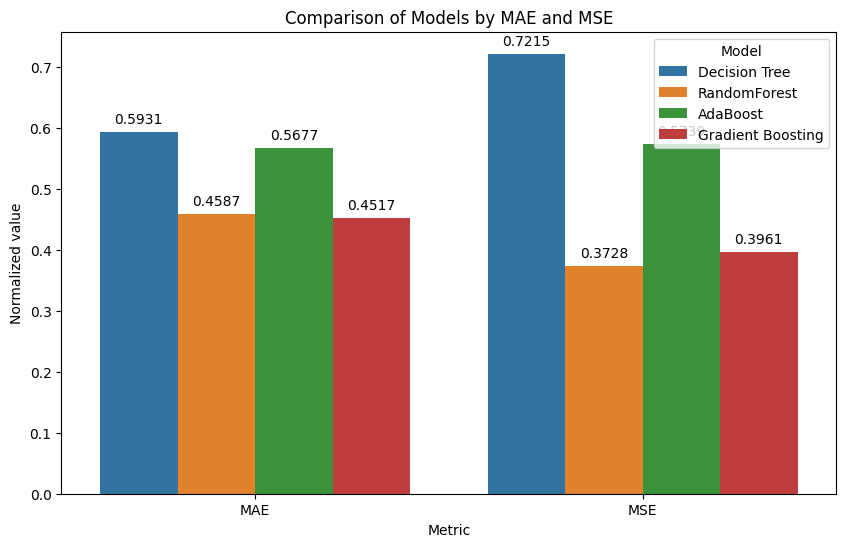

In [ ]:
metrics = pd.DataFrame([mae, mse], columns=names, index=['MAE', 'MSE'])
df_melted = metrics.reset_index().melt(
    id_vars='index', var_name='Model', value_name='Value')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='Value', hue='Model', data=df_melted)

plt.xlabel('Metric')
plt.ylabel('Normalized value')
plt.title('Comparison of Models by MAE and MSE')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()